# Moving window functions

In [22]:
%matplotlib inline

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
pal = sns.color_palette()

# Shift time series

In [24]:
ts = pd.Series(range(6), 
               pd.date_range('2020-06-01', freq='D', periods=6))
ts

2020-06-01    0
2020-06-02    1
2020-06-03    2
2020-06-04    3
2020-06-05    4
2020-06-06    5
Freq: D, dtype: int64

In [25]:
ts_lagged = ts.shift()
ts_lagged

2020-06-01    NaN
2020-06-02    0.0
2020-06-03    1.0
2020-06-04    2.0
2020-06-05    3.0
2020-06-06    4.0
Freq: D, dtype: float64

In [26]:
ts.diff()

2020-06-01    NaN
2020-06-02    1.0
2020-06-03    1.0
2020-06-04    1.0
2020-06-05    1.0
2020-06-06    1.0
Freq: D, dtype: float64

## Moving aggregate measures of a time series

In [31]:
ts = pd.Series(np.random.randn(6), 
               pd.date_range('2020-06-01', freq='D', periods=6))

In [44]:
ts_mean = ts.rolling(window=2).mean()
ts_min = ts.rolling(window=2).min()

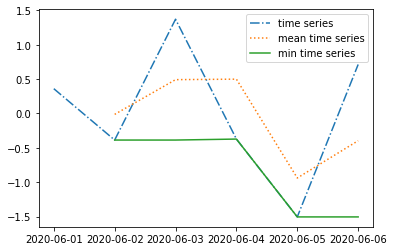

In [49]:
plt.plot(ts, color=pal[0], ls='-.', label='time series')
plt.plot(ts_mean, color=pal[1], ls=':', label='mean time series')
plt.plot(ts_min, color=pal[2], label='min time series')
plt.legend()

In [50]:
ts.rolling(window=2).apply(lambda x: (x[0] - x[1])/2)

2020-06-01         NaN
2020-06-02    0.373424
2020-06-03   -0.878421
2020-06-04    0.871252
2020-06-05    0.566060
2020-06-06   -1.108360
Freq: D, dtype: float64

### Expanding windows

In [52]:
ts = pd.Series(range(6), 
               pd.date_range('2020-06-01', freq='D', periods=6))

In [56]:
ts

2020-06-01    0
2020-06-02    1
2020-06-03    2
2020-06-04    3
2020-06-05    4
2020-06-06    5
Freq: D, dtype: int64

In [57]:
ts.expanding(min_periods=2).mean()

2020-06-01    NaN
2020-06-02    0.5
2020-06-03    1.0
2020-06-04    1.5
2020-06-05    2.0
2020-06-06    2.5
Freq: D, dtype: float64

## Expanding window moving average

In [64]:
ts = pd.Series(np.random.randn(6), 
               pd.date_range('2020-06-01', freq='D', periods=6))

In [65]:
ts_ewma = ts.ewm(com=2).mean()

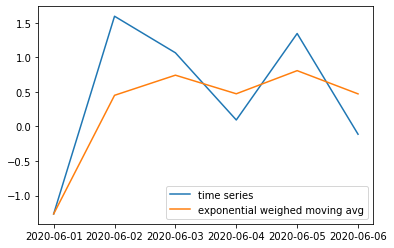

In [70]:
plt.plot(ts, color=pal[0], label='time series')
plt.plot(ts_ewma, color=pal[1], label='exponential weighed moving avg')
plt.legend()